### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [146]:
data = pd.read_csv('data/coupons.csv')

In [147]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [186]:
missing_values = data.isna().sum()
missing_values
# print(data.columns.tolist())
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [110]:
coupons_df_cleaned = data.drop(columns=['car'])
fill_values = {
    'Bar': 0,
    'CoffeeHouse': 0,
    'CarryAway': 0,
    'RestaurantLessThan20': 0,
    'Restaurant20To50': 0
}

# Use fillna with the dictionary to fill missing values in specified columns
coupons_df_cleaned.fillna(value=fill_values, inplace=True)
coupons_df_cleaned.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [14]:
total_observations = len(coupons_df_cleaned)
accepted_coupons = coupons_df_cleaned['Y'].sum()
proportion_accepted = accepted_coupons / total_observations

print(f"Total Observations: {total_observations}")
print(f"Total Accepted Coupons: {accepted_coupons}")
print(f"Proportion of Accepted Coupons: {proportion_accepted:.2%}")

Total Observations: 12684
Total Accepted Coupons: 7210
Proportion of Accepted Coupons: 56.84%


5. Use a bar plot to visualize the `coupon` column.

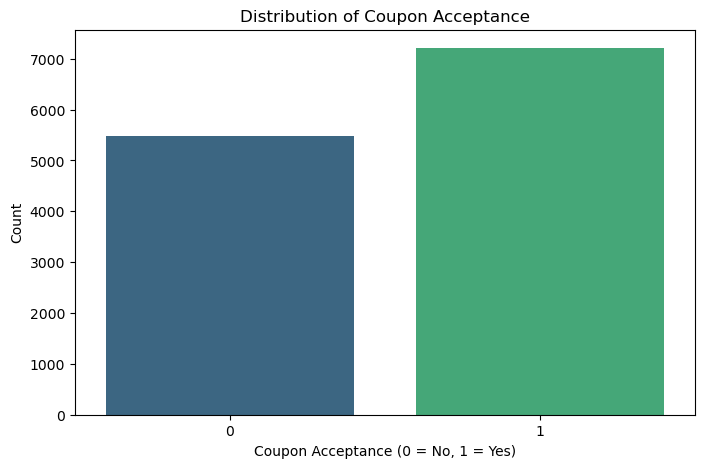

In [16]:
coupon_counts = coupons_df_cleaned['Y'].value_counts().reset_index()
coupon_counts.columns = ['Coupon Acceptance', 'Count']

# Create a bar plot with hue
plt.figure(figsize=(8, 5))
sns.barplot(x='Coupon Acceptance', y='Count', data=coupon_counts, hue='Coupon Acceptance', palette='viridis', legend=False)

# Adding labels and title
plt.xlabel('Coupon Acceptance (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Coupon Acceptance')

# Show plot
plt.show()

6. Use a histogram to visualize the temperature column.

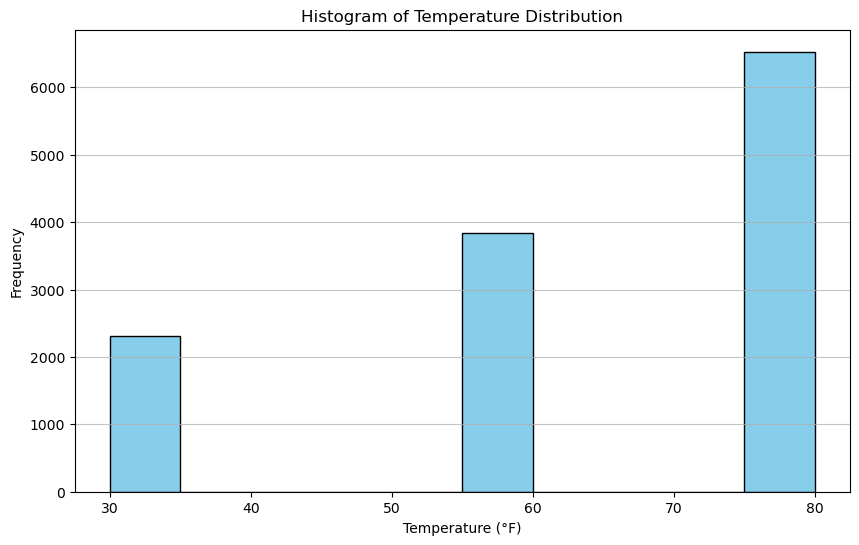

In [17]:
    # Create a histogram for the temperature column
    plt.figure(figsize=(10, 6))
    plt.hist(coupons_df_cleaned['temperature'], bins=10, color='skyblue', edgecolor='black')

    # Adding labels and title
    plt.xlabel('Temperature (°F)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Temperature Distribution')

    # Show plot
    plt.grid(axis='y', alpha=0.75)  # Optional: Add grid lines for better readability
    plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [151]:

pd.get_option('display.max_columns')
bar_coupons_df_cleaned = data.drop(columns=['car'])
fill_values = {
    'Bar': 0,
    'CoffeeHouse': 0,
    'CarryAway': 0,
    'RestaurantLessThan20': 0,
    'Restaurant20To50': 0
}
bar_coupons_df_cleaned.fillna(value=fill_values, inplace=True)
bar_coupons_df = bar_coupons_df_cleaned[bar_coupons_df_cleaned['coupon'] == 'Bar']
bar_coupons_df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,1,Bachelors degree,Education&Training&Library,$75000 - $87499,less1,1~3,1~3,1~3,less1,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [120]:
# Count total bar coupons
total_bar_coupons = len(bar_coupons_df)

# Count accepted bar coupons (Y = 1)
accepted_bar_coupons = bar_coupons_df['Y'].sum()

# Calculate proportion of accepted bar coupons
proportion_accepted_bar_coupons = accepted_bar_coupons / total_bar_coupons

# Display results
print(f"Total Bar Coupons: {total_bar_coupons}")
print(f"Total Accepted Bar Coupons: {accepted_bar_coupons}")
print(f"Proportion of Accepted Bar Coupons: {proportion_accepted_bar_coupons:.2%}")

Total Bar Coupons: 2017
Total Accepted Bar Coupons: 827
Proportion of Accepted Bar Coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


0.6473551637279596
0.7688442211055276


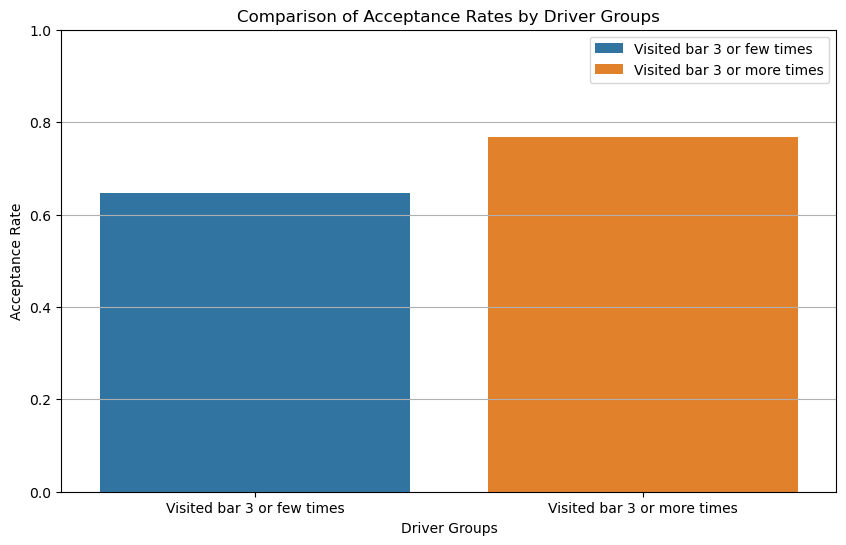

In [130]:
# Create a new column for bar visit categories
def categorize_bar_visits(frequency):
    if frequency in ['1~3']:
        return '3 or fewer'
    elif frequency in ['4~8', 'gt8']:
        return 'more than 3'
    else:
        return None  # Handle any unexpected values

# Apply the function to create a new column
bar_coupons_df_cleaned['bar_visit_category'] = bar_coupons_df_cleaned['Bar'].apply(categorize_bar_visits)

# Calculate total counts and acceptance rates for each group
group_3_or_fewer = bar_coupons_df[bar_coupons_df['bar_visit_category'] == '3 or fewer']
group_more_than_3 = bar_coupons_df[bar_coupons_df['bar_visit_category'] == 'more than 3']

# Count the number of people in each category
count_3_or_fewer = len(group_3_or_fewer)
count_more_than_3 = len(group_more_than_3)

# Calculate acceptance counts
accepted_3_or_fewer = group_3_or_fewer['Y'].sum()
accepted_more_than_3 = group_more_than_3['Y'].sum()

# Calculate acceptance rates
acceptance_rate_3_or_fewer = accepted_3_or_fewer / count_3_or_fewer
acceptance_rate_more_than_3 = accepted_more_than_3 / count_more_than_3

print(acceptance_rate_3_or_fewer)
print(acceptance_rate_more_than_3)

groups = ['Visited bar 3 or few times', 'Visited bar 3 or more times']
acceptance_rates = [acceptance_rate_3_or_fewer, acceptance_rate_more_than_3]  # Acceptance rates in decimal form

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=groups, y=acceptance_rates, hue=groups, legend=True)
plt.title('Comparison of Acceptance Rates by Driver Groups')
plt.xlabel('Driver Groups')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for percentage representation
# plt.xticks(rotation=)  # Rotate x-axis labels if necessary
plt.grid(axis='y')

# Show the plot
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


0.6997167138810199
0.41312959818902095


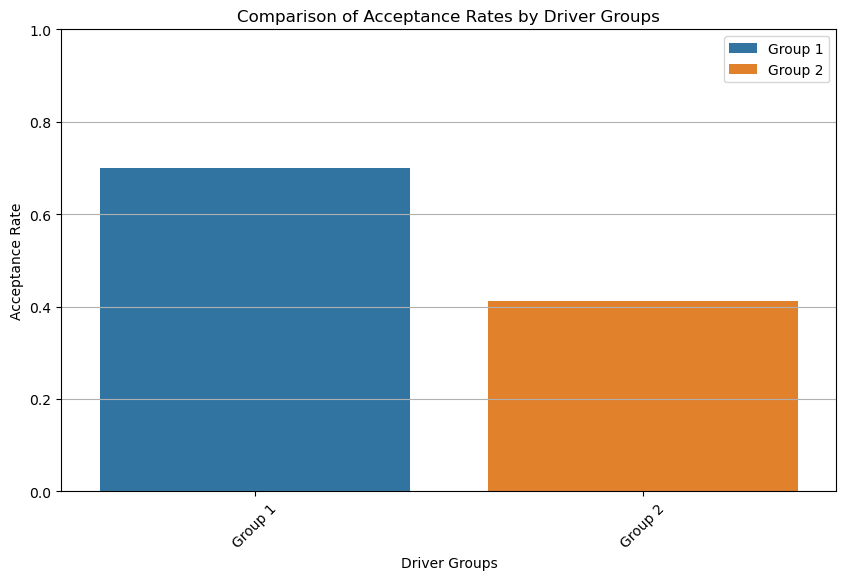

In [131]:
bar_coupons_df_cleaned['age'] = pd.to_numeric(bar_coupons_df_cleaned['age'], errors='coerce')

# Now perform filtering based on age
group_1 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons_df['age'] > 25)
]

group_2 = bar_coupons_df[~((bar_coupons_df['Bar'].isin(['never', 'less1', '0'])) & 
                                (bar_coupons_df['age'] < 25))]

# Step 2: Calculate total counts and acceptance rates for each group
count_group_1 = len(group_1)
count_group_2 = len(group_2)

accepted_group_1 = group_1['Y'].sum()
accepted_group_2 = group_2['Y'].sum()

acceptance_rate_group_1 = accepted_group_1 / count_group_1
acceptance_rate_group_2 = accepted_group_2 / count_group_2

print(acceptance_rate_group_1)
print(acceptance_rate_group_2)

groups = ['Group 1', 'Group 2']
acceptance_rates = [acceptance_rate_group_1, acceptance_rate_group_2]  # Acceptance rates in decimal form

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=groups, y=acceptance_rates, hue=groups, legend=True)
plt.title('Comparison of Acceptance Rates by Driver Groups')
plt.xlabel('Driver Groups')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for percentage representation
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.grid(axis='y')

# Show the plot
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


0.6879194630872483
0.7132486388384754
0.7132486388384754


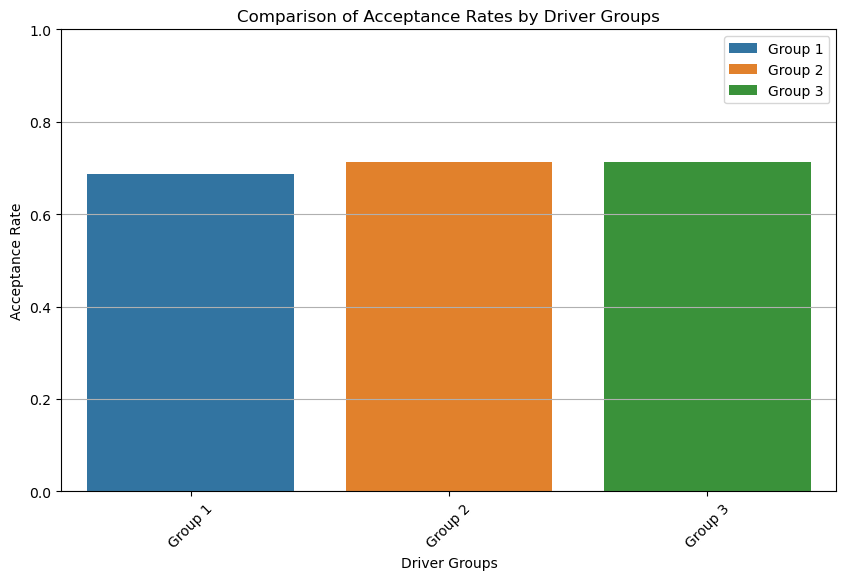

In [128]:
group_1 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8']))]
group_2 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons_df['passanger'] != 'Kid(s)')
]
group_3 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons_df['passanger'] != 'Kid(s)') & 
    (~bar_coupons_df['occupation'].isin(['farming', 'fishing', 'forestry']))
]
count_group_1 = len(group_1)
count_group_2 = len(group_2)
count_group_3 = len(group_3)

accepted_group_1 = group_1['Y'].sum()
accepted_group_2 = group_2['Y'].sum()
accepted_group_3 = group_3['Y'].sum()

acceptance_rate_group_1 = accepted_group_1 / count_group_1
acceptance_rate_group_2 = accepted_group_2 / count_group_2
acceptance_rate_group_3 = accepted_group_3 / count_group_3

print(acceptance_rate_group_1)
print(acceptance_rate_group_2)
print(acceptance_rate_group_3)
groups = ['Group 1', 'Group 2', 'Group 3']
acceptance_rates = [acceptance_rate_group_1, acceptance_rate_group_2, acceptance_rate_group_3]  # Acceptance rates in decimal form

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=groups, y=acceptance_rates, hue=groups, legend=True)
plt.title('Comparison of Acceptance Rates by Driver Groups')
plt.xlabel('Driver Groups')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for percentage representation
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.grid(axis='y')

# Show the plot
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



0.7132486388384754
0.7313432835820896
0.45348837209302323


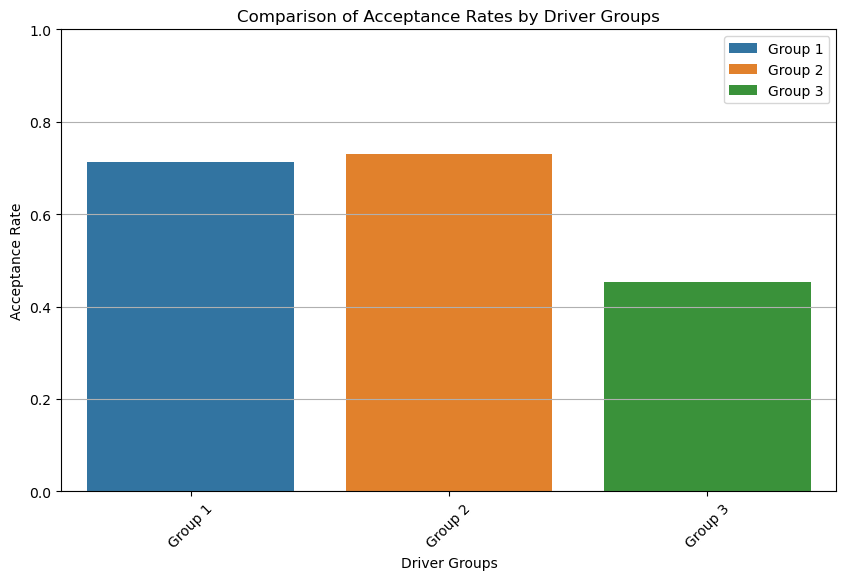

In [132]:
group_1 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons_df['passanger'] != 'Kid(s)') &
    (bar_coupons_df['maritalStatus'] != 'Widowed')
]
group_2 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons_df['age'] < 30)
] 
group_3 = bar_coupons_df[
    (bar_coupons_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (bar_coupons_df['income'].isin(['Less than $12500', '$12500 - $24999' , '$25000 - $37499', '$37500 - $49999']))
]

count_group_1 = len(group_1)
count_group_2 = len(group_2)
count_group_3 = len(group_3)

accepted_group_1 = group_1['Y'].sum()
accepted_group_2 = group_2['Y'].sum()
accepted_group_3 = group_3['Y'].sum()

acceptance_rate_group_1 = accepted_group_1 / count_group_1
acceptance_rate_group_2 = accepted_group_2 / count_group_2
acceptance_rate_group_3 = accepted_group_3 / count_group_3

print(acceptance_rate_group_1)
print(acceptance_rate_group_2)
print(acceptance_rate_group_3)
groups = ['Group 1', 'Group 2', 'Group 3']
acceptance_rates = [acceptance_rate_group_1, acceptance_rate_group_2, acceptance_rate_group_3]  # Acceptance rates in decimal form

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=groups, y=acceptance_rates, hue=groups, legend=True)
plt.title('Comparison of Acceptance Rates by Driver Groups')
plt.xlabel('Driver Groups')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for percentage representation
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.grid(axis='y')

# Show the plot
plt.show()
# s = coupons_df_cleaned['income']
# s.unique()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

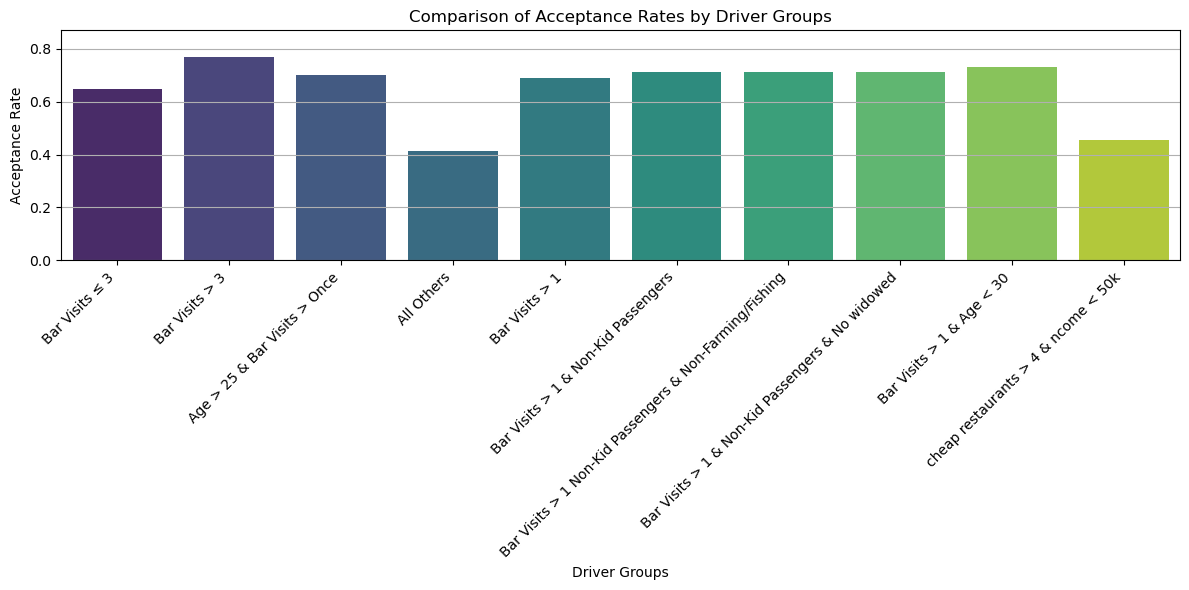

In [144]:
labels = [
    'Bar Visits ≤ 3', 
    'Bar Visits > 3',
    'Age > 25 & Bar Visits > Once', 
    'All Others',
    'Bar Visits > 1', 
    'Bar Visits > 1 & Non-Kid Passengers', 
    'Bar Visits > 1 Non-Kid Passengers & Non-Farming/Fishing',
    'Bar Visits > 1 & Non-Kid Passengers & No widowed', 
    'Bar Visits > 1 & Age < 30', 
    'cheap restaurants > 4 & ncome < 50k'
]

acceptance_rates = [
    0.6474,  # Bar Visits ≤ 3
    0.7688,  # Bar Visits > 3
    0.6997,  # Age > 25 & Bar Visits > Once
    0.4131,  # All Others
    0.6879,  # Bar Visits > 1
    0.7132,  # Bar Visits > 1 & Non-Kid Passengers
    0.7132,  # Bar Visits > 1 Non-Kid Passengers & Non-Farming/Fishing
    0.7132,  # Bar Visits > 1 & Non-Kid Passengers & No widowed
    0.7313,  # Bar Visits > 1 & Age < 30
    0.4535   # cheap restaurants > 4 & ncome < 50k
]

data = pd.DataFrame({
    'Labels': labels,
    'Acceptance Rates': acceptance_rates
})

# Create a bar plot with hue assigned to Labels and no legend
plt.figure(figsize=(12,6))
sns.barplot(x='Labels', y='Acceptance Rates', data=data, hue='Labels', palette='viridis', legend=False)
plt.title('Comparison of Acceptance Rates by Driver Groups')
plt.xlabel('Driver Groups')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.ylim(0, max(acceptance_rates) + 0.1) # Set y-axis limits for better visibility
plt.grid(axis='y')

# Show the plot
plt.tight_layout() # Adjust layout to prevent clipping of tick-labels
plt.show()

## Hypotheses

**Hypothesis 1**: Drivers who go to bars more than once a month and have passengers that are not kids will have a higher acceptance rate of bar coupons compared to those who do not.

**Hypothesis 2**: Younger drivers (under the age of 30) will show a higher acceptance rate of bar coupons compared to older drivers.

**Hypothesis 3**: Drivers with lower income levels (less than $50K) will be more likely to accept bar coupons than those with higher incomes.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [171]:
coffee_coupons_df_cleaned = data.drop(columns=['car'])
fill_values = {
    'Bar': 0,
    'CoffeeHouse': 0,
    'CarryAway': 0,
    'RestaurantLessThan20': 0,
    'Restaurant20To50': 0
}
coffee_coupons_df_cleaned.fillna(value=fill_values, inplace=True)
coffee_coupons_df = coffee_coupons_df_cleaned[coffee_coupons_df_cleaned['coupon'] == 'Coffee House']
coffee_coupons_df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,0,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,0,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,0,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,0,4~8,1~3,1,0,0,0,1,0
16,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,0,4~8,1~3,1,1,1,0,1,1
21,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,0,4~8,1~3,1,1,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0


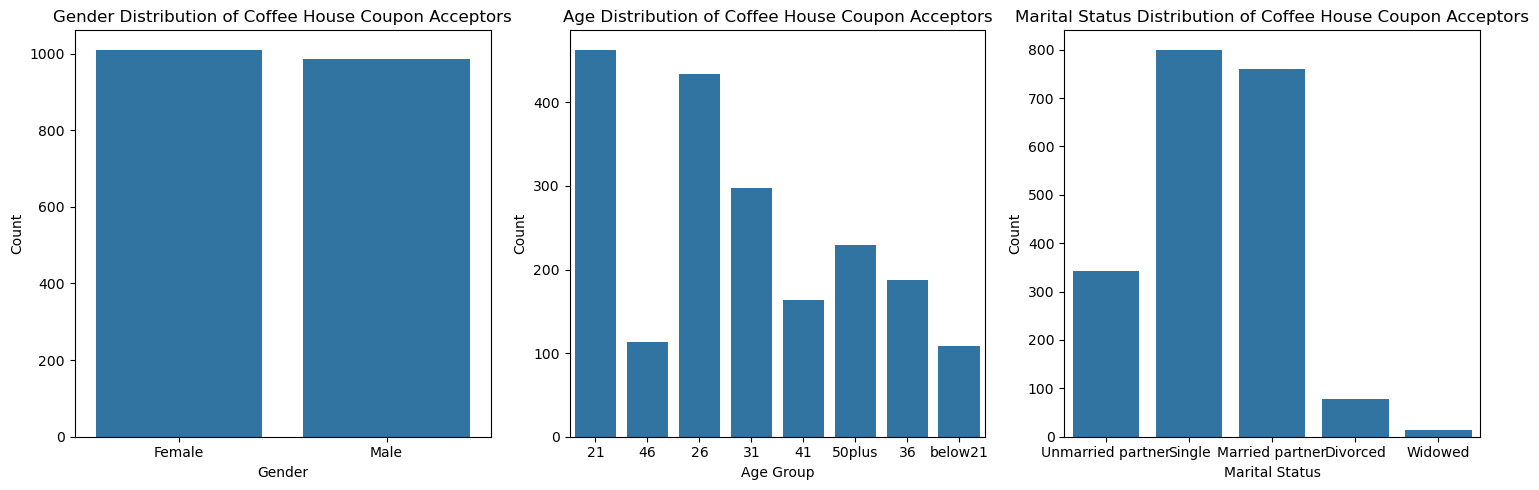

In [157]:
# Filter data for coffee house coupons (assuming 'Y' indicates acceptance)
coffee_coupon_data = coffee_coupons_df[coffee_coupons_df['Y'] == 1]  # Accepted coupons

# Analyze User Attributes
gender_distribution_coffee = coffee_coupon_data['gender'].value_counts()
age_distribution_coffee = coffee_coupon_data['age'].value_counts()
marital_status_distribution_coffee = coffee_coupon_data['maritalStatus'].value_counts()

# Visualize Findings
plt.figure(figsize=(15,5))

# Gender Distribution Plot
plt.subplot(1, 3, 1)
sns.countplot(x='gender', data=coffee_coupon_data)
plt.title('Gender Distribution of Coffee House Coupon Acceptors')
plt.xlabel('Gender')
plt.ylabel('Count')

# Age Distribution Plot
plt.subplot(1, 3, 2)
sns.countplot(x='age', data=coffee_coupon_data)
plt.title('Age Distribution of Coffee House Coupon Acceptors')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Marital Status Distribution Plot
plt.subplot(1, 3, 3)
sns.countplot(x='maritalStatus', data=coffee_coupon_data)
plt.title('Marital Status Distribution of Coffee House Coupon Acceptors')
plt.xlabel('Marital Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

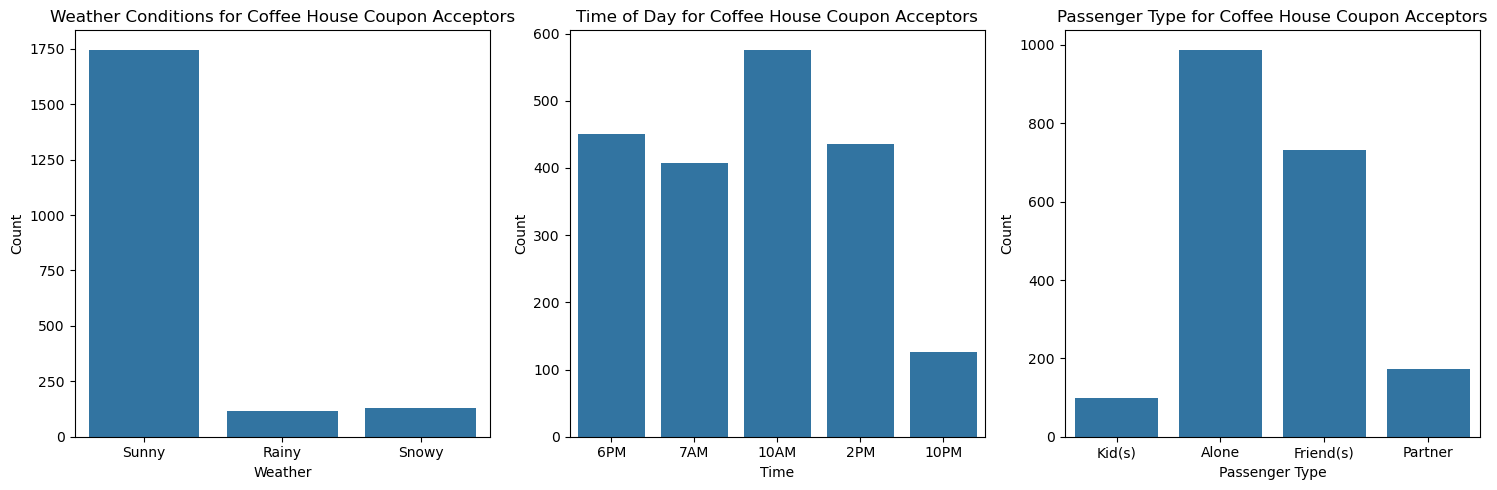

In [169]:
# Analyze Contextual Attributes
weather_distribution_coffee = coffee_coupon_data['weather'].value_counts()
time_distribution_coffee = coffee_coupon_data['time'].value_counts()
passenger_distribution_coffee = coffee_coupon_data['passanger'].value_counts()

# Visualize Findings
plt.figure(figsize=(15,5))

# Weather Distribution Plot
plt.subplot(1, 3, 1)
sns.countplot(x='weather', data=coffee_coupon_data)
plt.title('Weather Conditions for Coffee House Coupon Acceptors')
plt.xlabel('Weather')
plt.ylabel('Count')

# Time Distribution Plot
plt.subplot(1, 3, 2)
sns.countplot(x='time', data=coffee_coupon_data)
plt.title('Time of Day for Coffee House Coupon Acceptors')
plt.xlabel('Time')
plt.ylabel('Count')

# Passenger Type Distribution Plot
plt.subplot(1, 3, 3)
sns.countplot(x='passanger', data=coffee_coupon_data)
plt.title('Passenger Type for Coffee House Coupon Acceptors')
plt.xlabel('Passenger Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


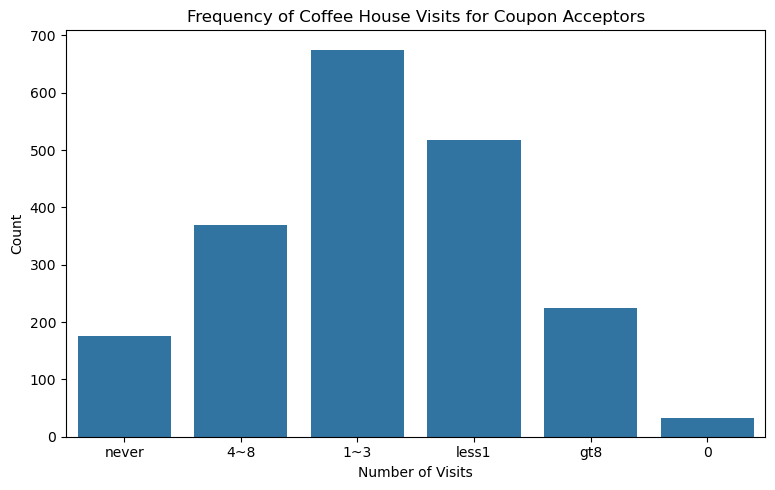

In [168]:
# Analyze Behavioral Attributes
coffee_visits_distribution = coffee_coupon_data['CoffeeHouse'].value_counts()

# Visualize Findings
plt.figure(figsize=(15,5))

# Coffee Visits Distribution Plot
plt.subplot(1, 2, 1)
sns.countplot(x='CoffeeHouse', data=coffee_coupon_data)
plt.title('Frequency of Coffee House Visits for Coupon Acceptors')
plt.xlabel('Number of Visits')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

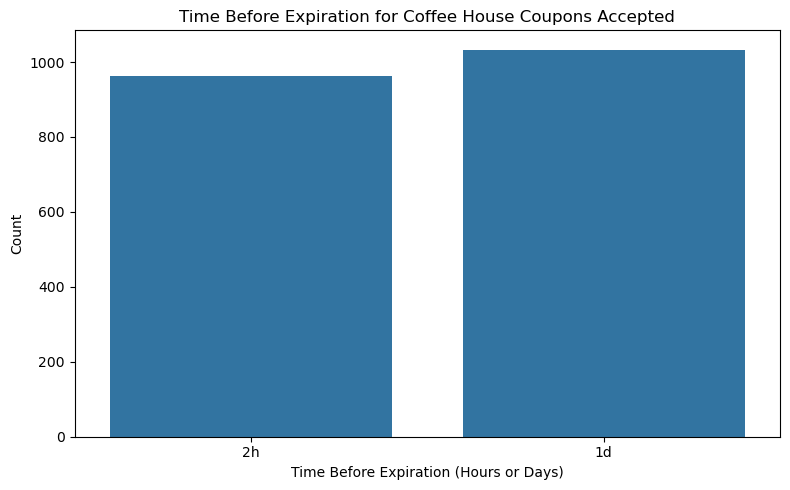

In [167]:
# Analyze Coupon Attributes (time before expiration)
expiration_distribution_coffee = coffee_coupon_data['expiration'].value_counts()

# Visualize Findings
plt.figure(figsize=(8,5))
sns.countplot(x='expiration', data=coffee_coupon_data)
plt.title('Time Before Expiration for Coffee House Coupons Accepted')
plt.xlabel('Time Before Expiration (Hours or Days)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()